In [9]:
dataWalkCsvHand=[
    "../All_Data/20220117走路data/手25sec915cm25step.csv"
    ,"../All_Data/20220117走路data/手25sec930cm21step.csv"
    ,"../All_Data/20220117走路data/手25sec1065cm31step.csv"
    ,"../All_Data/20220117走路data/手25sec1095cm32step.csv"
    ,"../All_Data/20220117走路data/手25sec1215cm31step.csv"
    ,"../All_Data/20220117走路data/手25sec1260cm35step.csv"
    ,"../All_Data/20220117走路data/手25sec1305cm40step.csv"
    ,"../All_Data/20220117走路data/手25sec1410cm34step.csv"
    ,"../All_Data/20220117走路data/手25sec1470cm41step.csv"]
# 
dataWalkCsvFoot=[
    "../All_Data/20220117走路data/腳25sec915cm25step.csv"
    ,"../All_Data/20220117走路data/腳25sec930cm21step.csv"
    ,"../All_Data/20220117走路data/腳25sec1065cm31step.csv"
    ,"../All_Data/20220117走路data/腳25sec1095cm32step.csv"
    ,"../All_Data/20220117走路data/腳25sec1215cm31step.csv"
    ,"../All_Data/20220117走路data/腳25sec1260cm35step.csv"
    ,"../All_Data/20220117走路data/腳25sec1305cm40step.csv"
    ,"../All_Data/20220117走路data/腳25sec1410cm34step.csv"
    ,"../All_Data/20220117走路data/腳25sec1470cm41step.csv"]
# 
dataTakeCsvHand=[
     "../All_Data/220304拿放水壺(坐著)/手2022-03-04 114035.csv"
    , "../All_Data/220304拿放水壺(坐著)/手2022-03-04 114800.csv"
    , "../All_Data/220304拿放水壺(坐著)/手2022-03-04 114937.csv"
    , "../All_Data/220304拿放水壺(坐著)/手2022-03-04 115132.csv"
    , "../All_Data/220304拿放水壺(坐著)/手2022-03-04 115300.csv"
    , "../All_Data/220304拿放水壺(坐著)/手2022-03-04 115739.csv"
    , "../All_Data/220304拿放水壺(坐著)/手2022-03-04 115951.csv"
    , "../All_Data/220304拿放水壺(坐著)/手2022-03-04 115530.csv"]
# 
dataTakeCsvFoot=[
     "../All_Data/220304拿放水壺(坐著)/腳2022-03-04 114035.csv"
    , "../All_Data/220304拿放水壺(坐著)/腳2022-03-04 114800.csv"
    , "../All_Data/220304拿放水壺(坐著)/腳2022-03-04 114937.csv"
    , "../All_Data/220304拿放水壺(坐著)/腳2022-03-04 115132.csv"
    , "../All_Data/220304拿放水壺(坐著)/腳2022-03-04 115300.csv"
    , "../All_Data/220304拿放水壺(坐著)/腳2022-03-04 115739.csv"
    , "../All_Data/220304拿放水壺(坐著)/腳2022-03-04 115951.csv"
    , "../All_Data/220304拿放水壺(坐著)/腳2022-03-04 115530.csv"]


In [10]:
import serial
import csv
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, ifft
import math

dataWalk = pd.read_csv(dataWalkCsvHand[8])
dataWalk = np.array(dataWalk)

dataTake= pd.read_csv(dataTakeCsvHand[1])
dataTake = np.array(dataTake)

lengthOfWalk=[]
for i in range(len(dataWalk[:,1])):
    lengthOfWalk.append(i)
lengthOfTake=[]
for i in range(len(dataTake[:,1])):
    lengthOfTake.append(i)


跑出讀入的資料

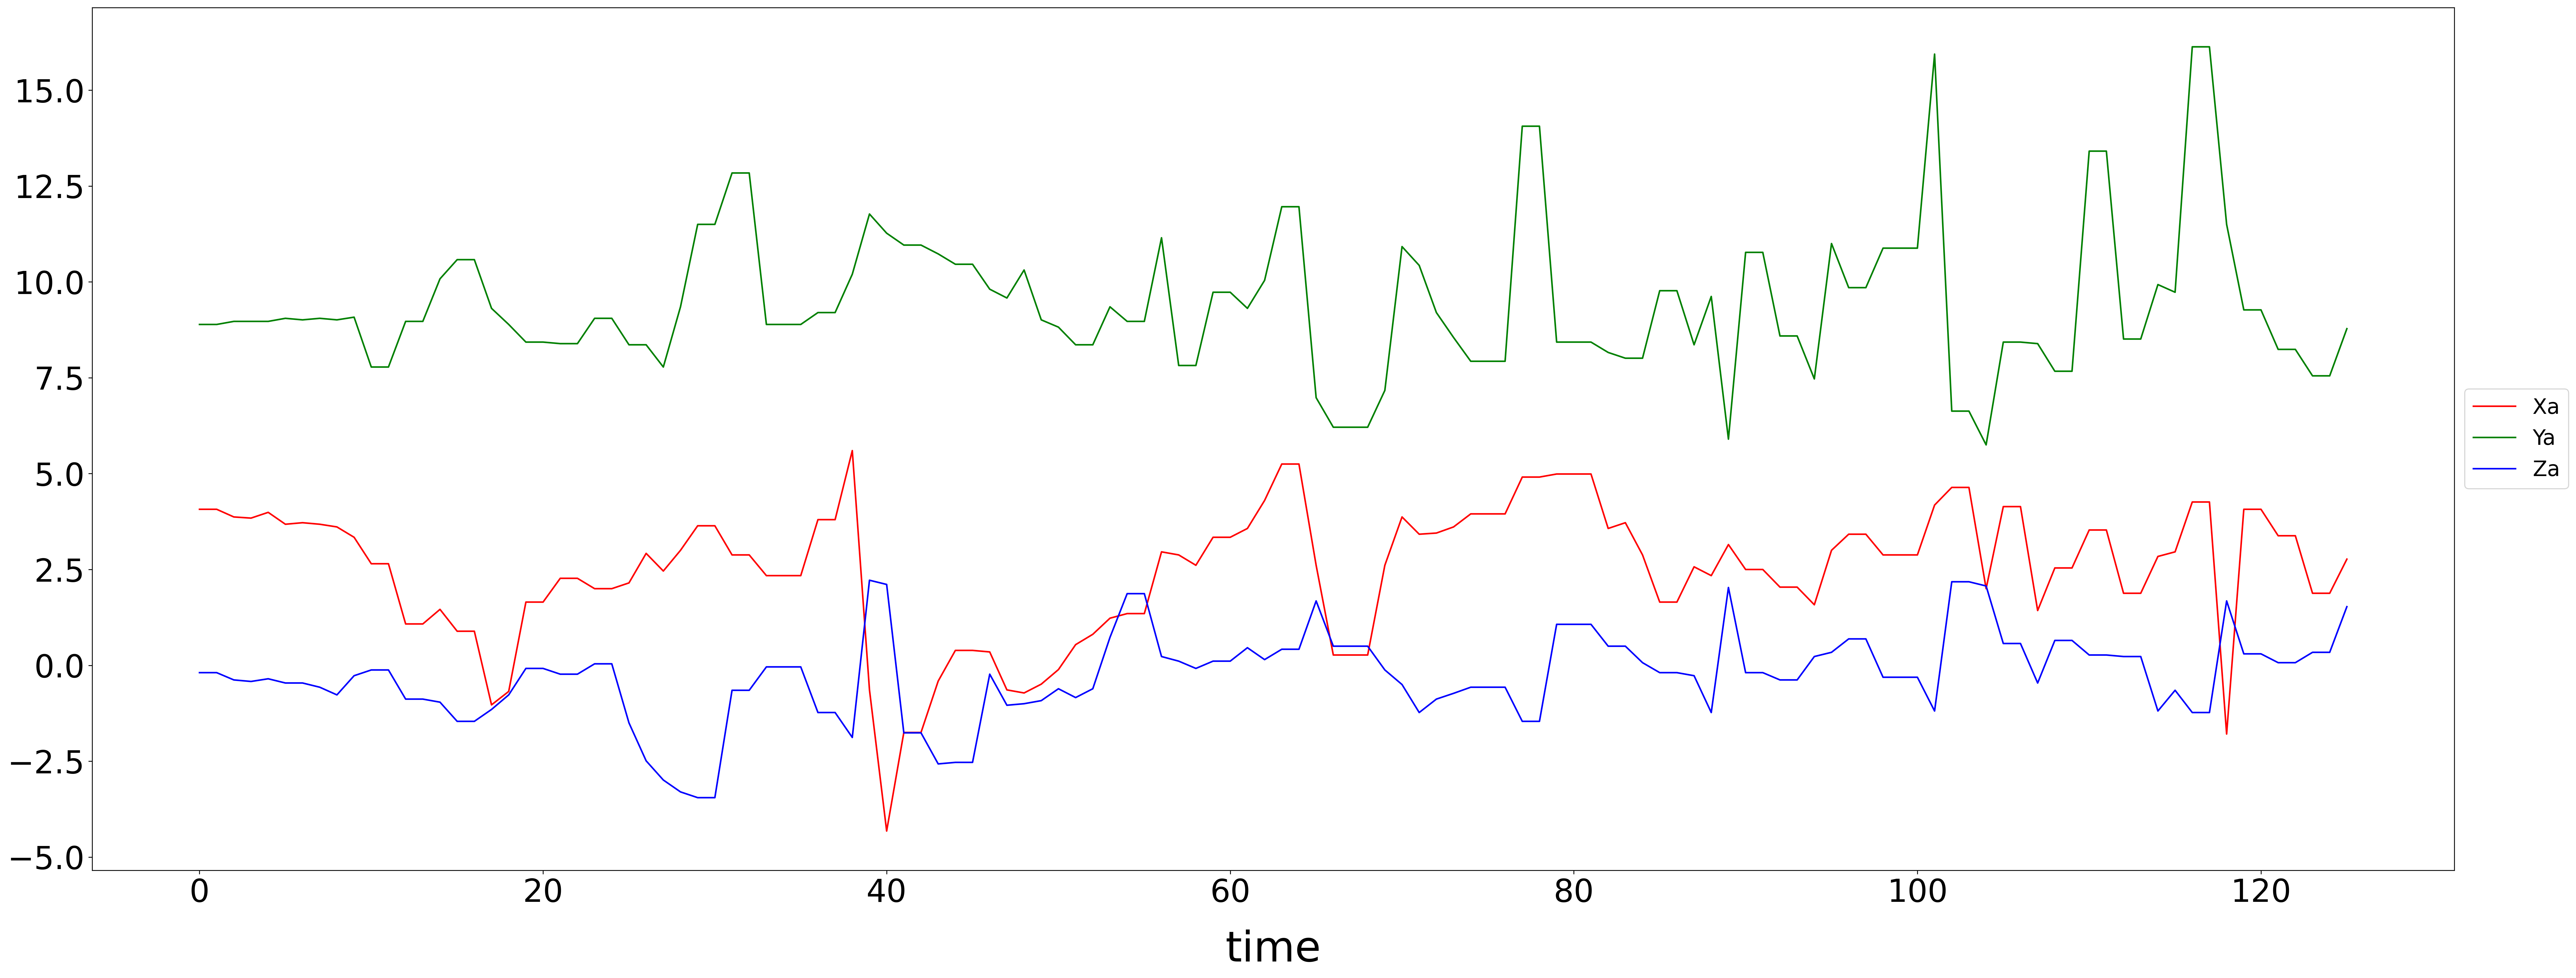

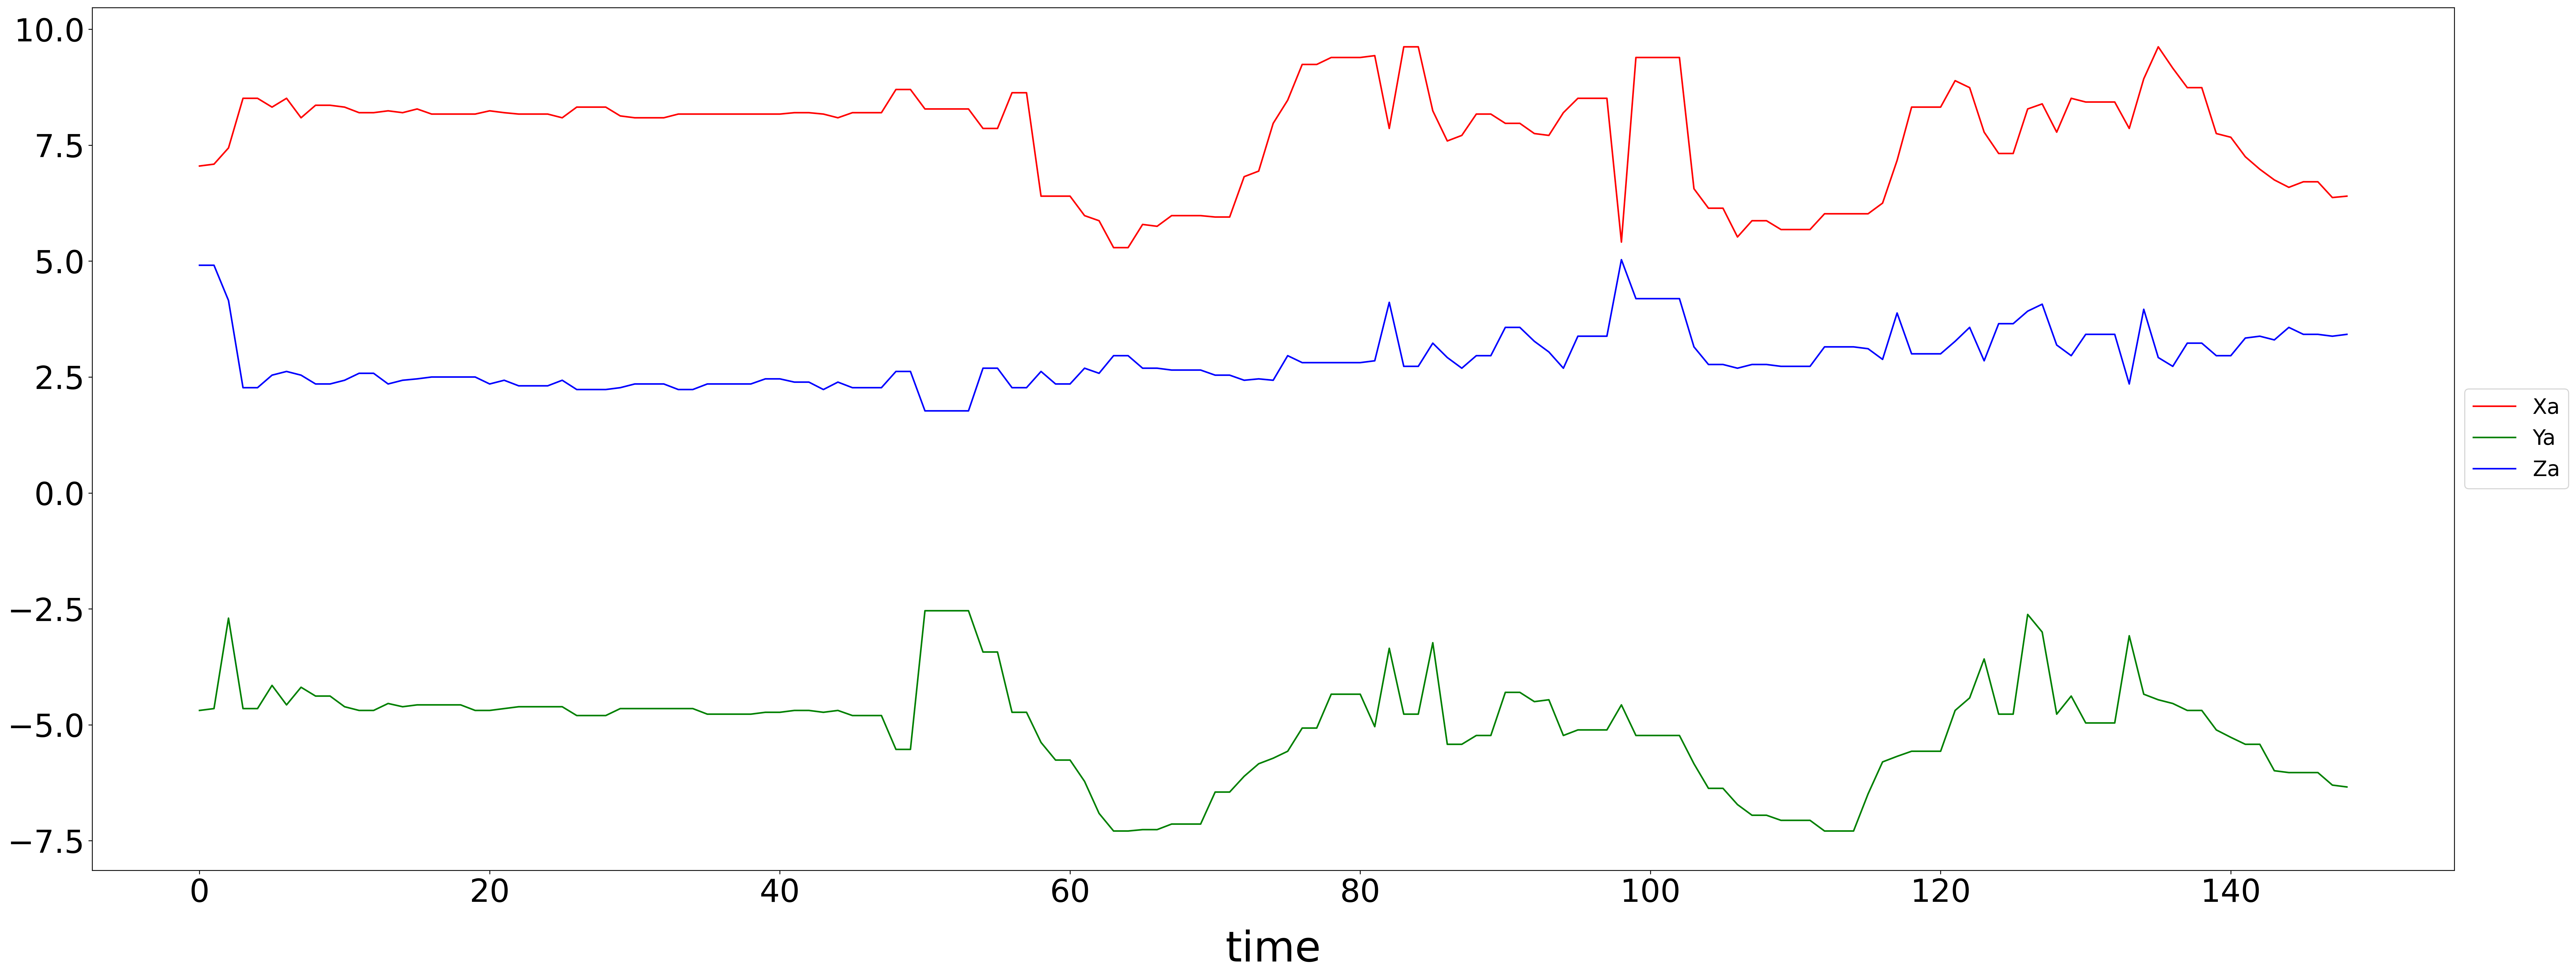

In [11]:
# show all data
plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xlabel("time", fontsize = 40, labelpad = 20)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.plot(lengthOfWalk, dataWalk[:,7], color = 'r', label = "Xa")
plt.plot(lengthOfWalk, dataWalk[:,8], color = 'g', label = "Ya")
plt.plot(lengthOfWalk, dataWalk[:,9], color = 'b', label = "Za")
plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
plt.show()

# show all data
plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xlabel("time", fontsize = 40, labelpad = 20)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.plot(lengthOfTake, dataTake[:,7], color = 'r', label = "Xa")
plt.plot(lengthOfTake, dataTake[:,8], color = 'g', label = "Ya")
plt.plot(lengthOfTake, dataTake[:,9], color = 'b', label = "Za")
plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
plt.show()

Merge Data

In [12]:
startIndex=7
dataLength=50000

mergeData=[[],[],[]]
for index in range(startIndex, startIndex+3):
    bigDataTake=[]
    bigDataWalk=[]
    for i in range (int((dataLength/len(dataWalk[:,index])))):
        bigDataWalk.append(dataWalk[:,index])
    for i in range (int((dataLength/len(dataTake[:,index])))):
        bigDataTake.append(dataTake[:,index])

    mergeData[index-startIndex]=np.append(bigDataWalk,bigDataTake)
lengthOfMergeData=[]
for i in range(len(mergeData[0])):
    lengthOfMergeData.append(i)





Show part of merge data

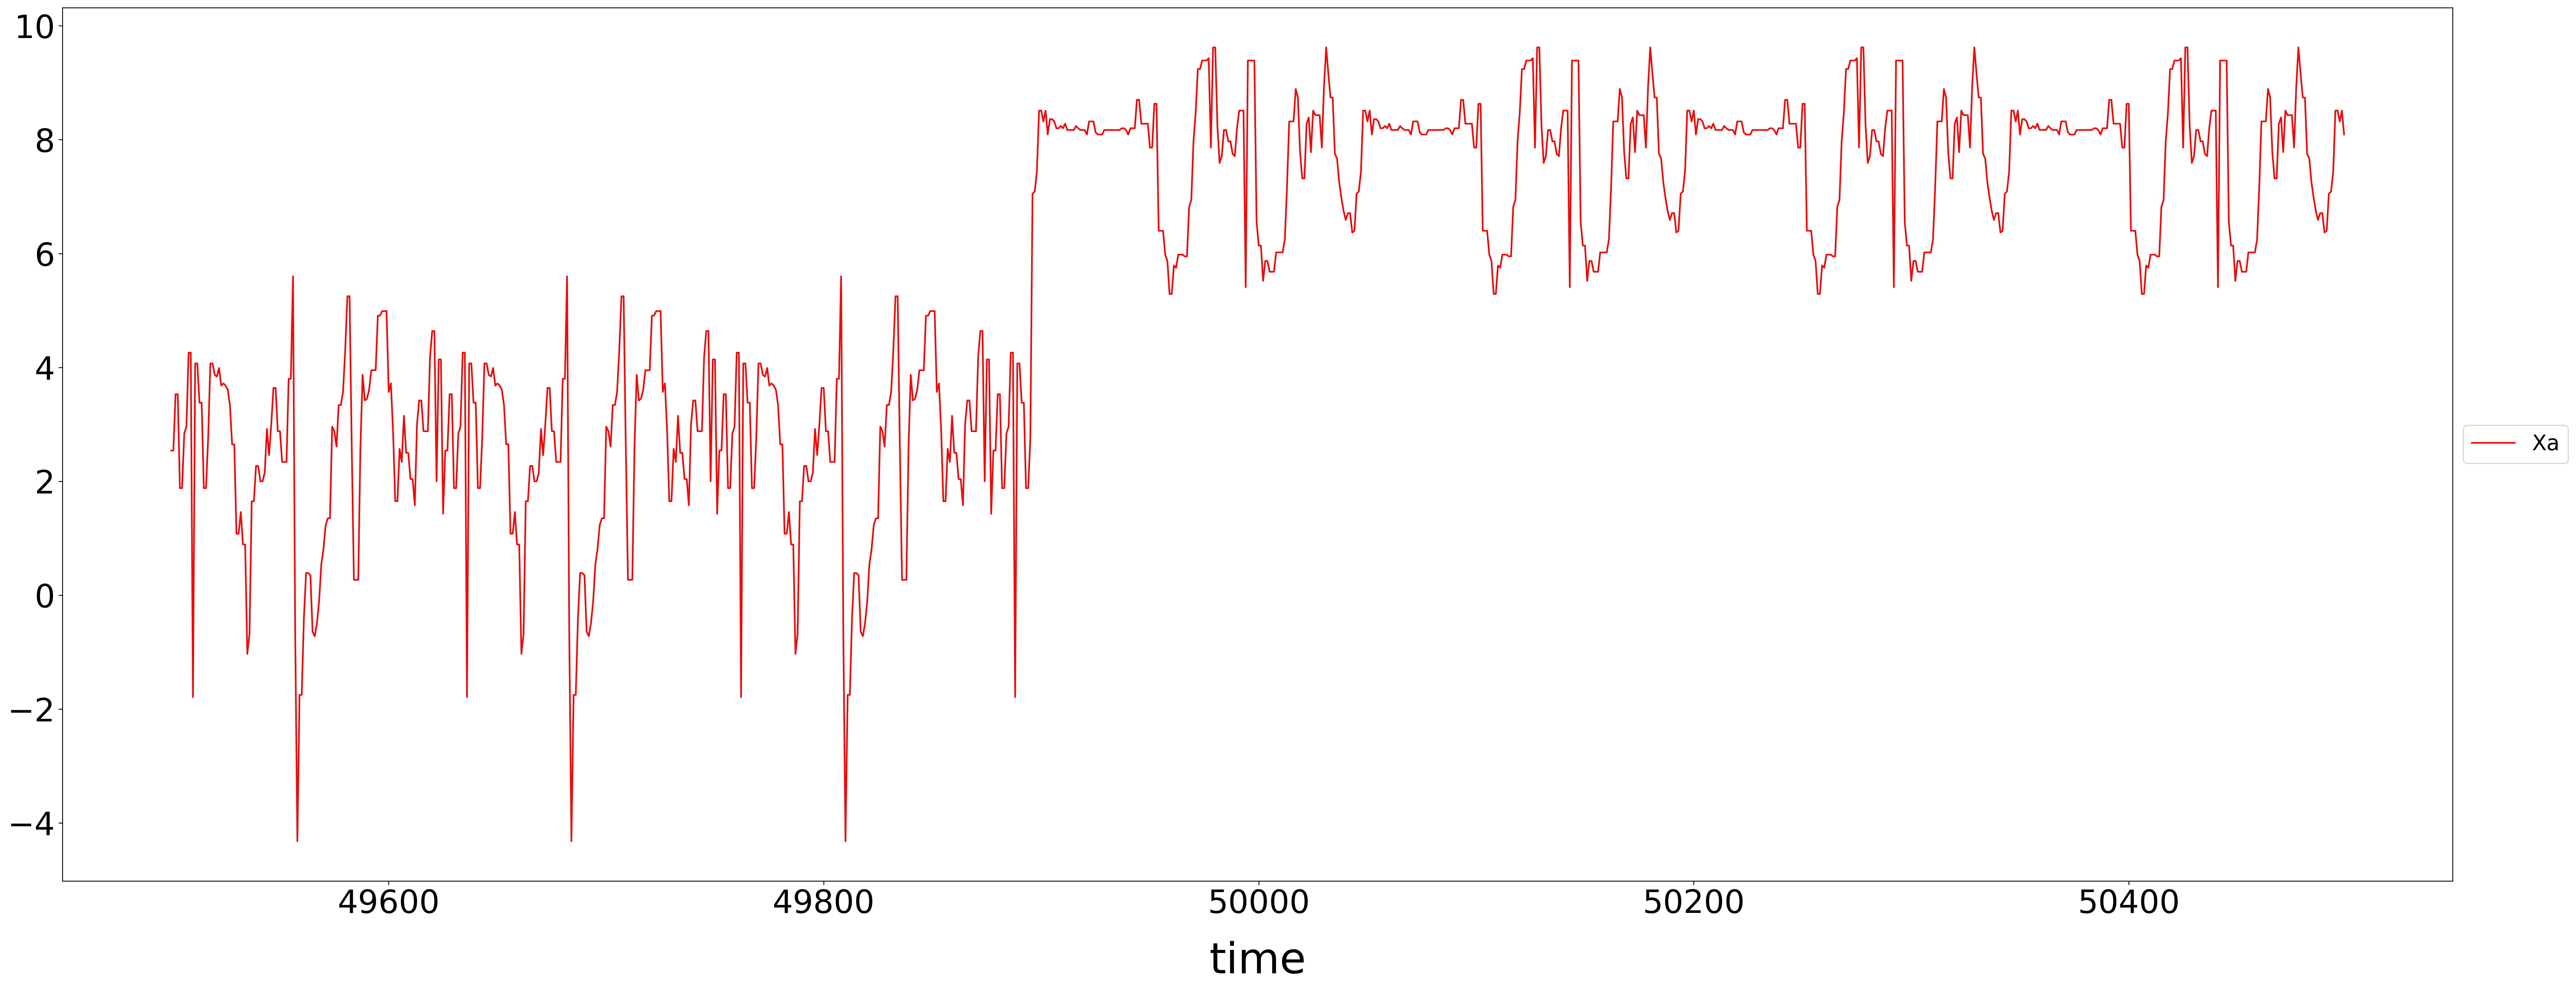

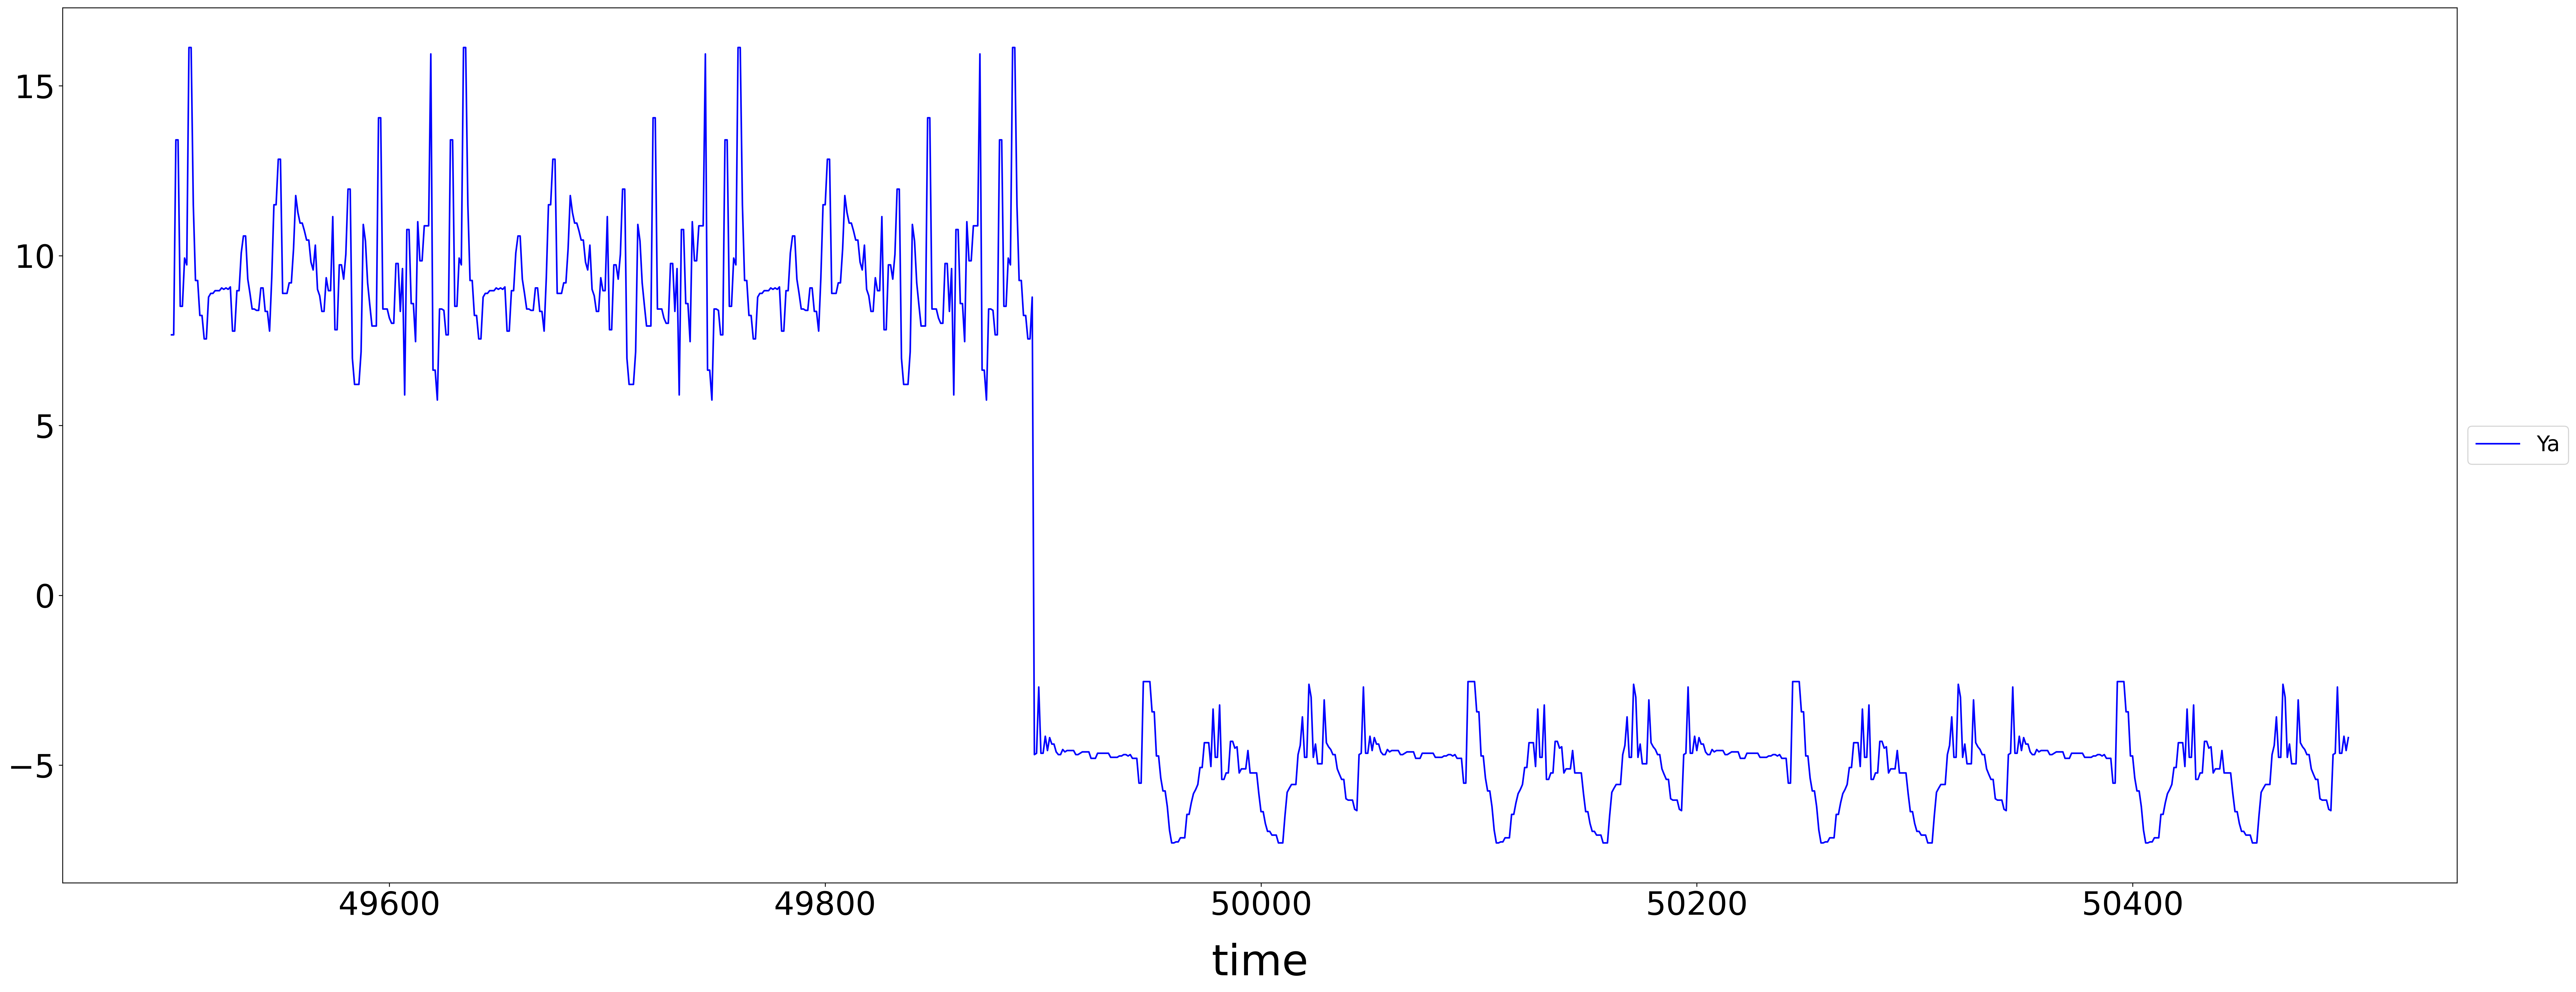

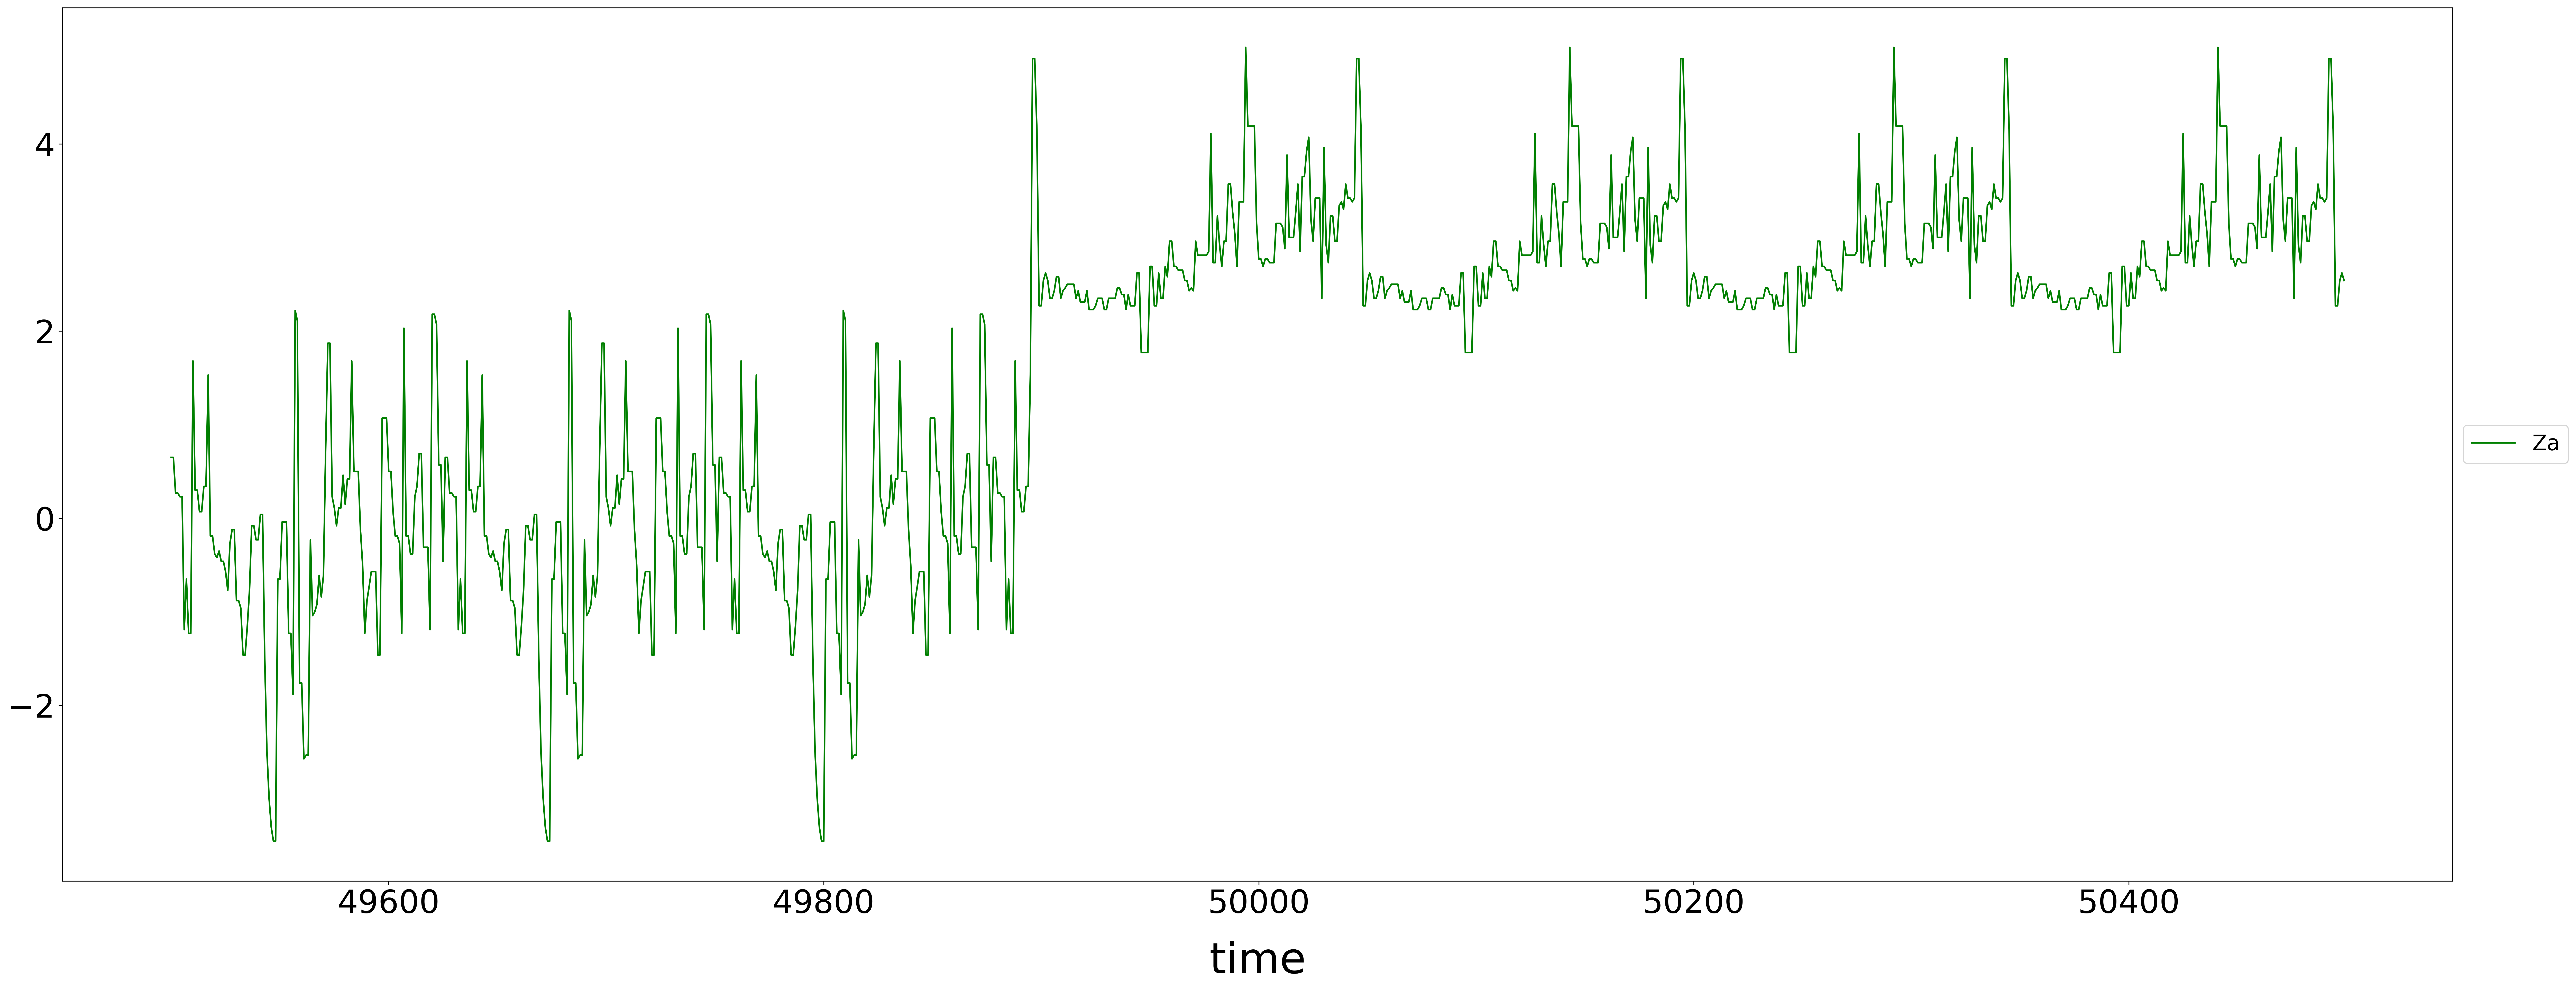

In [13]:
start=49500
length=np.arange(start,start+1000)
# show all data
plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xlabel("time", fontsize = 40, labelpad = 20)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.plot(length, mergeData[0][start:start+1000], color = 'r', label = "Xa")
plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
plt.show()

# show all data
plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xlabel("time", fontsize = 40, labelpad = 20)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.plot(length, mergeData[1][start:start+1000], color = 'b', label = "Ya")
plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
plt.show()

# show all data
plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xlabel("time", fontsize = 40, labelpad = 20)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.plot(length, mergeData[2][start:start+1000], color = 'g', label = "Za")
plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
plt.show()

Show merged data

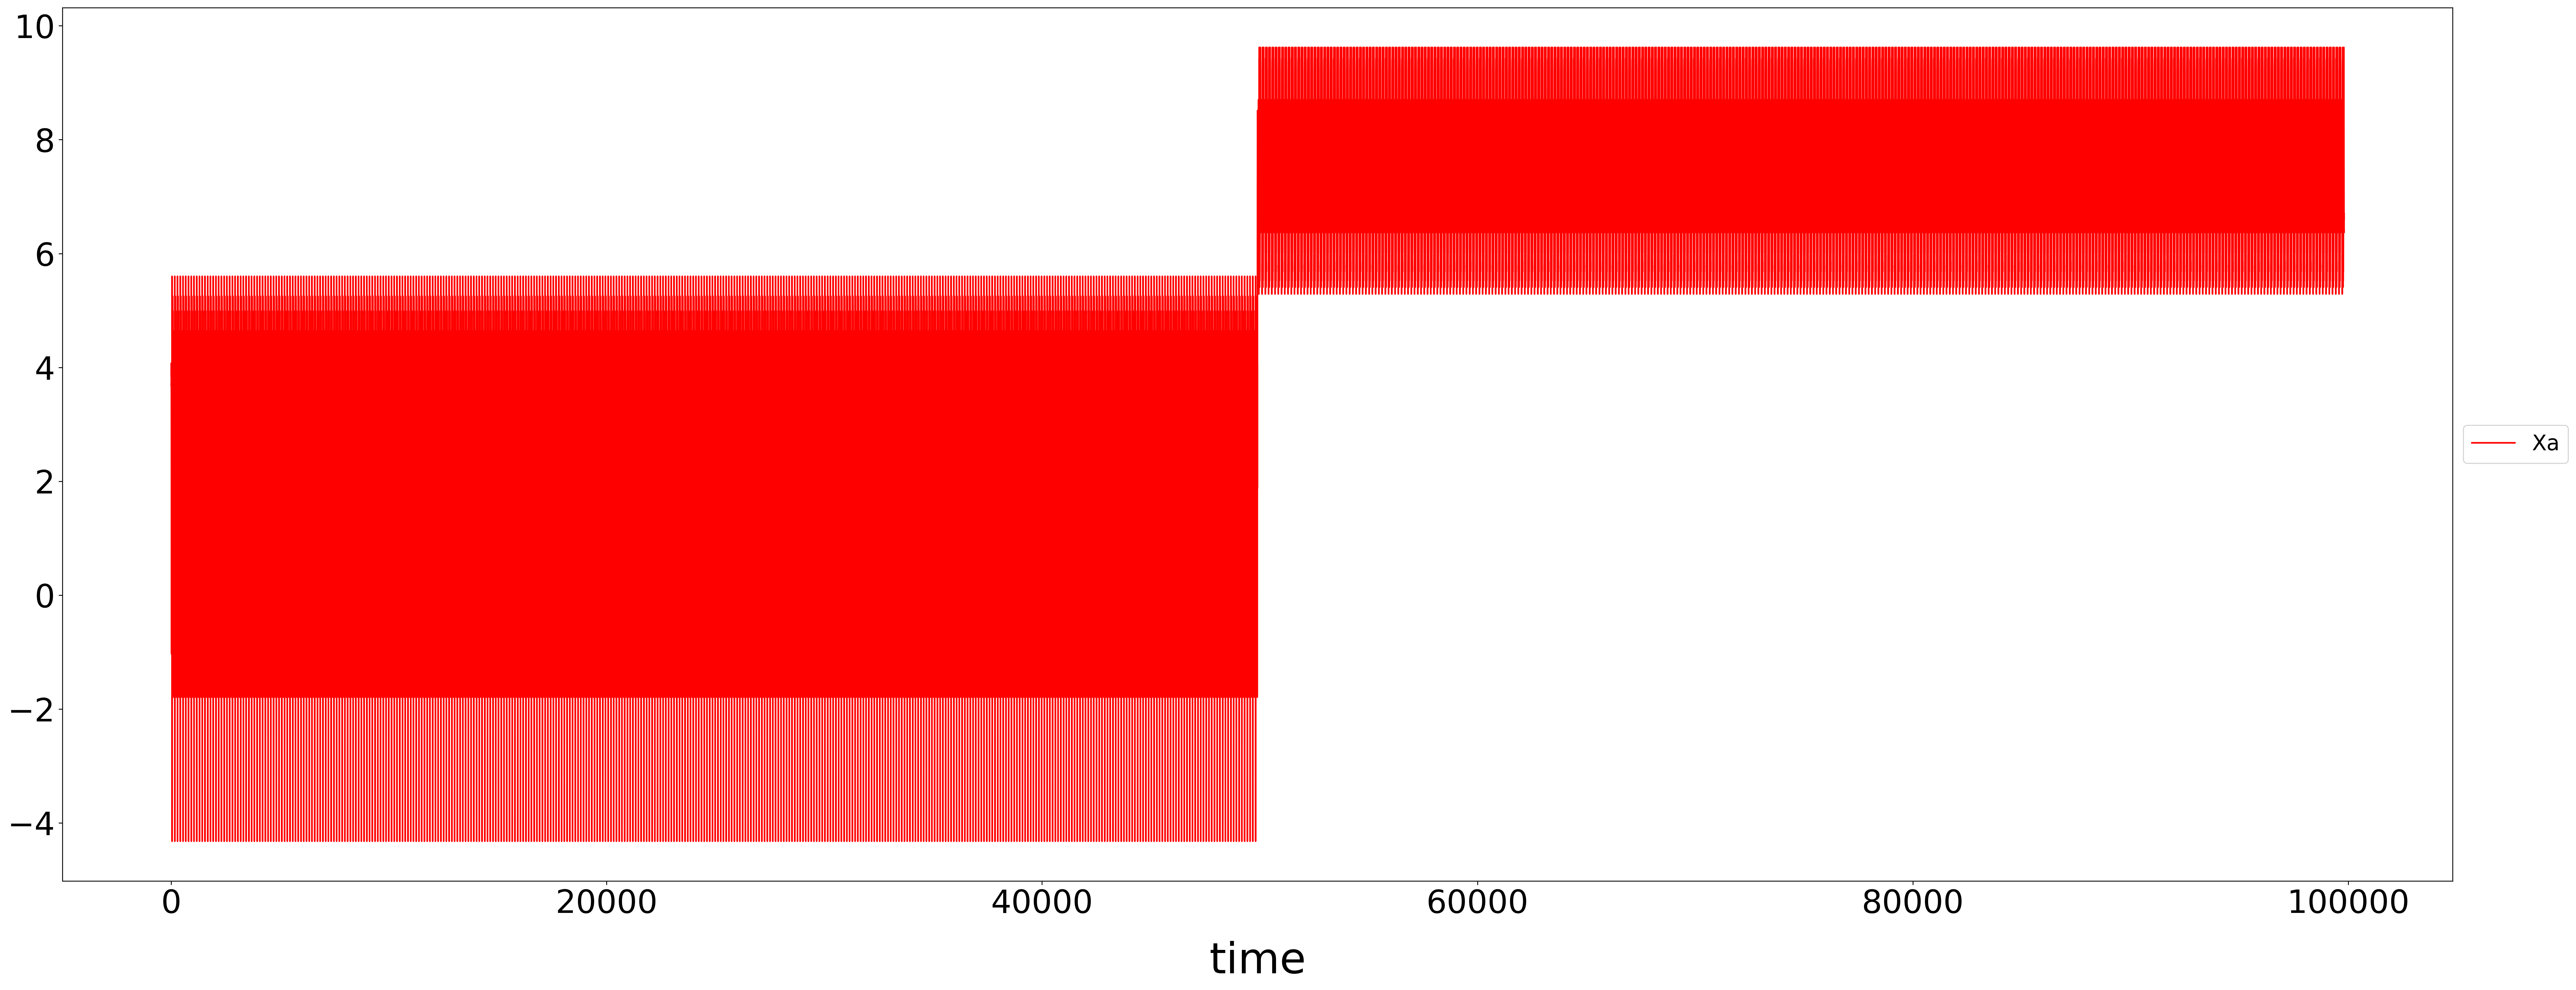

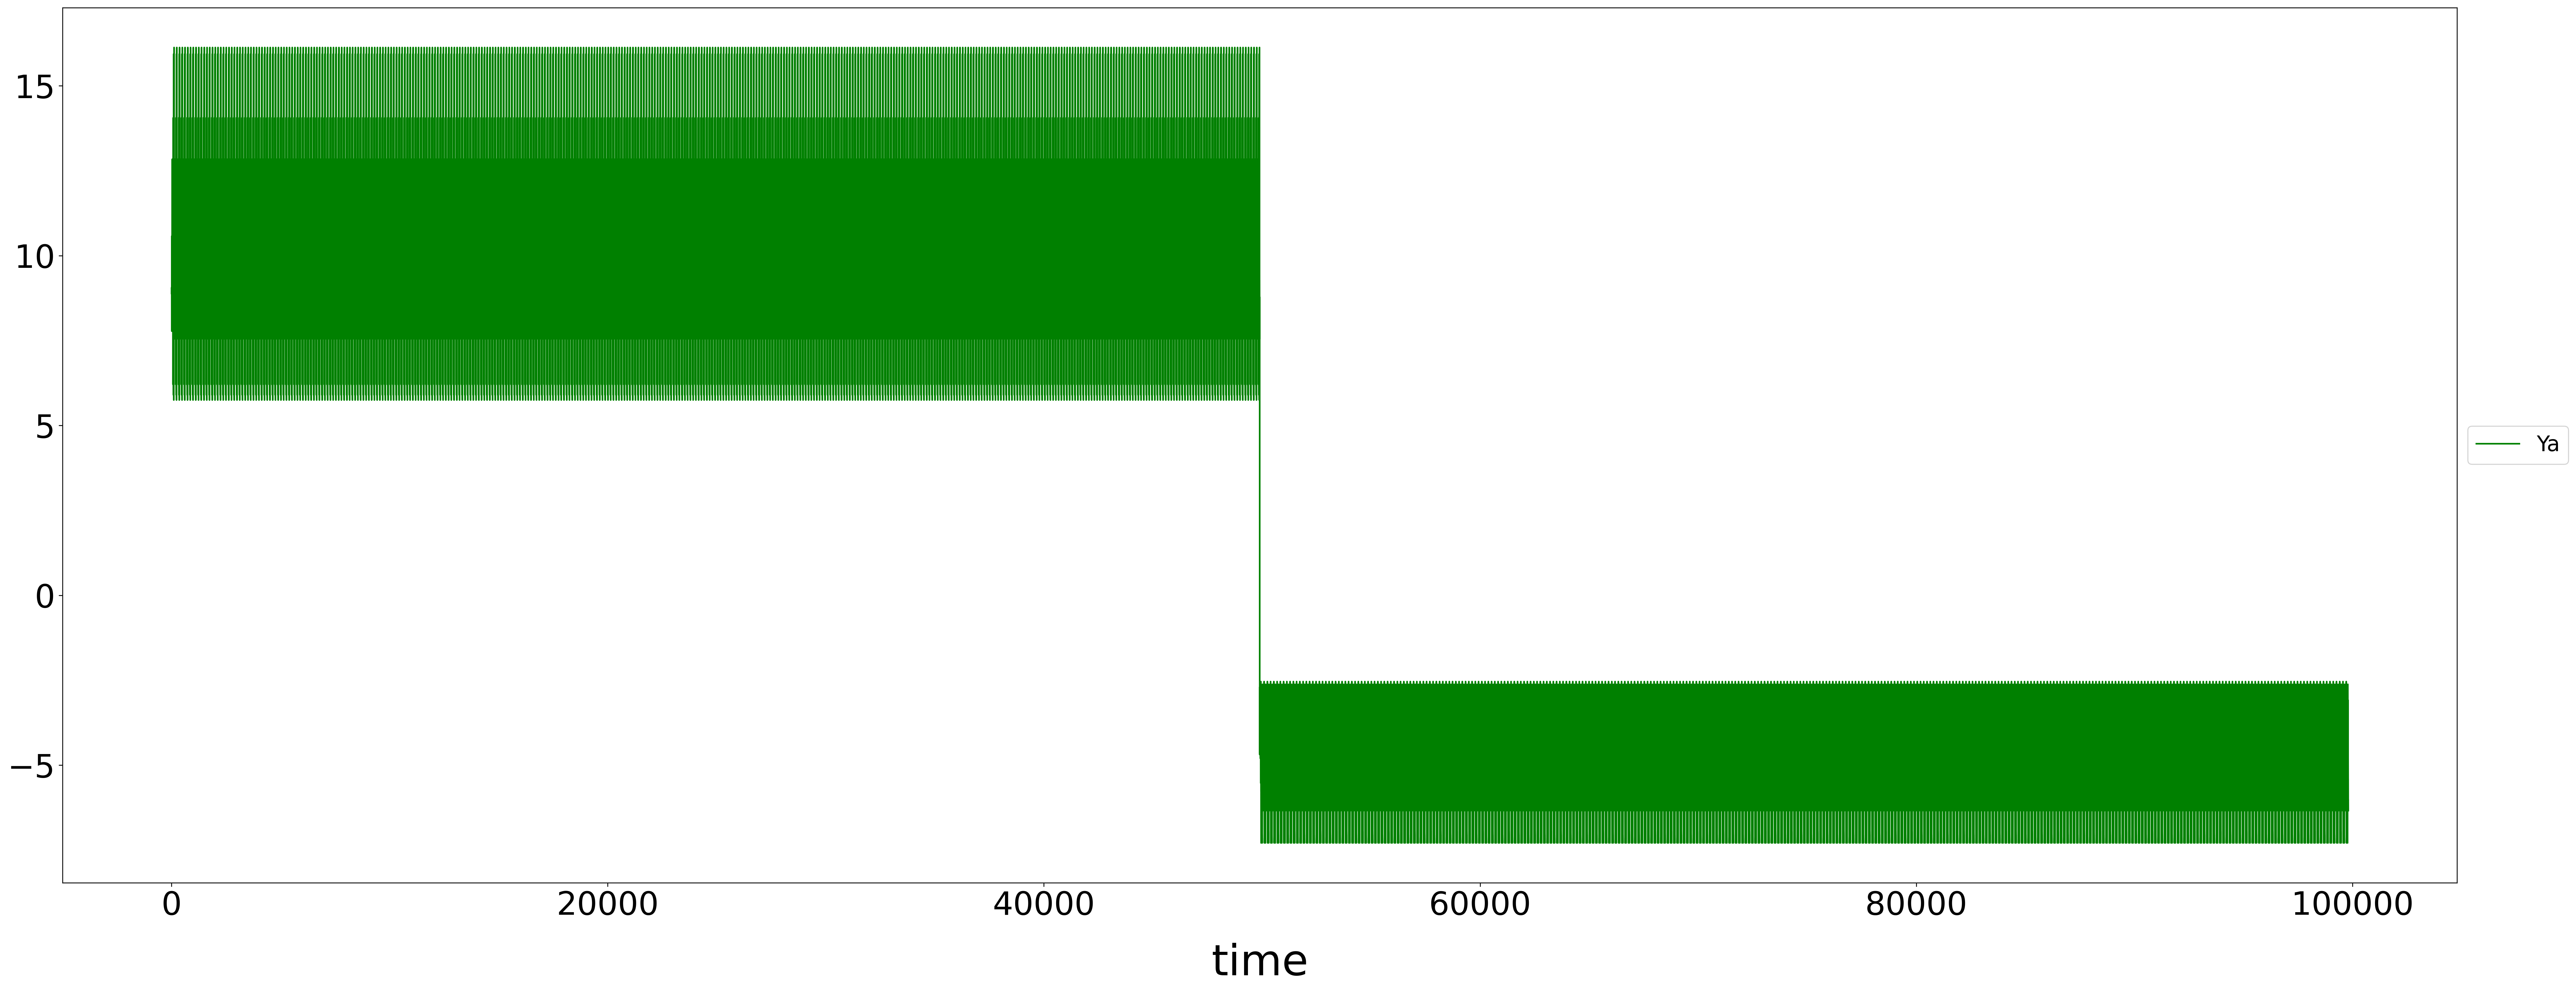

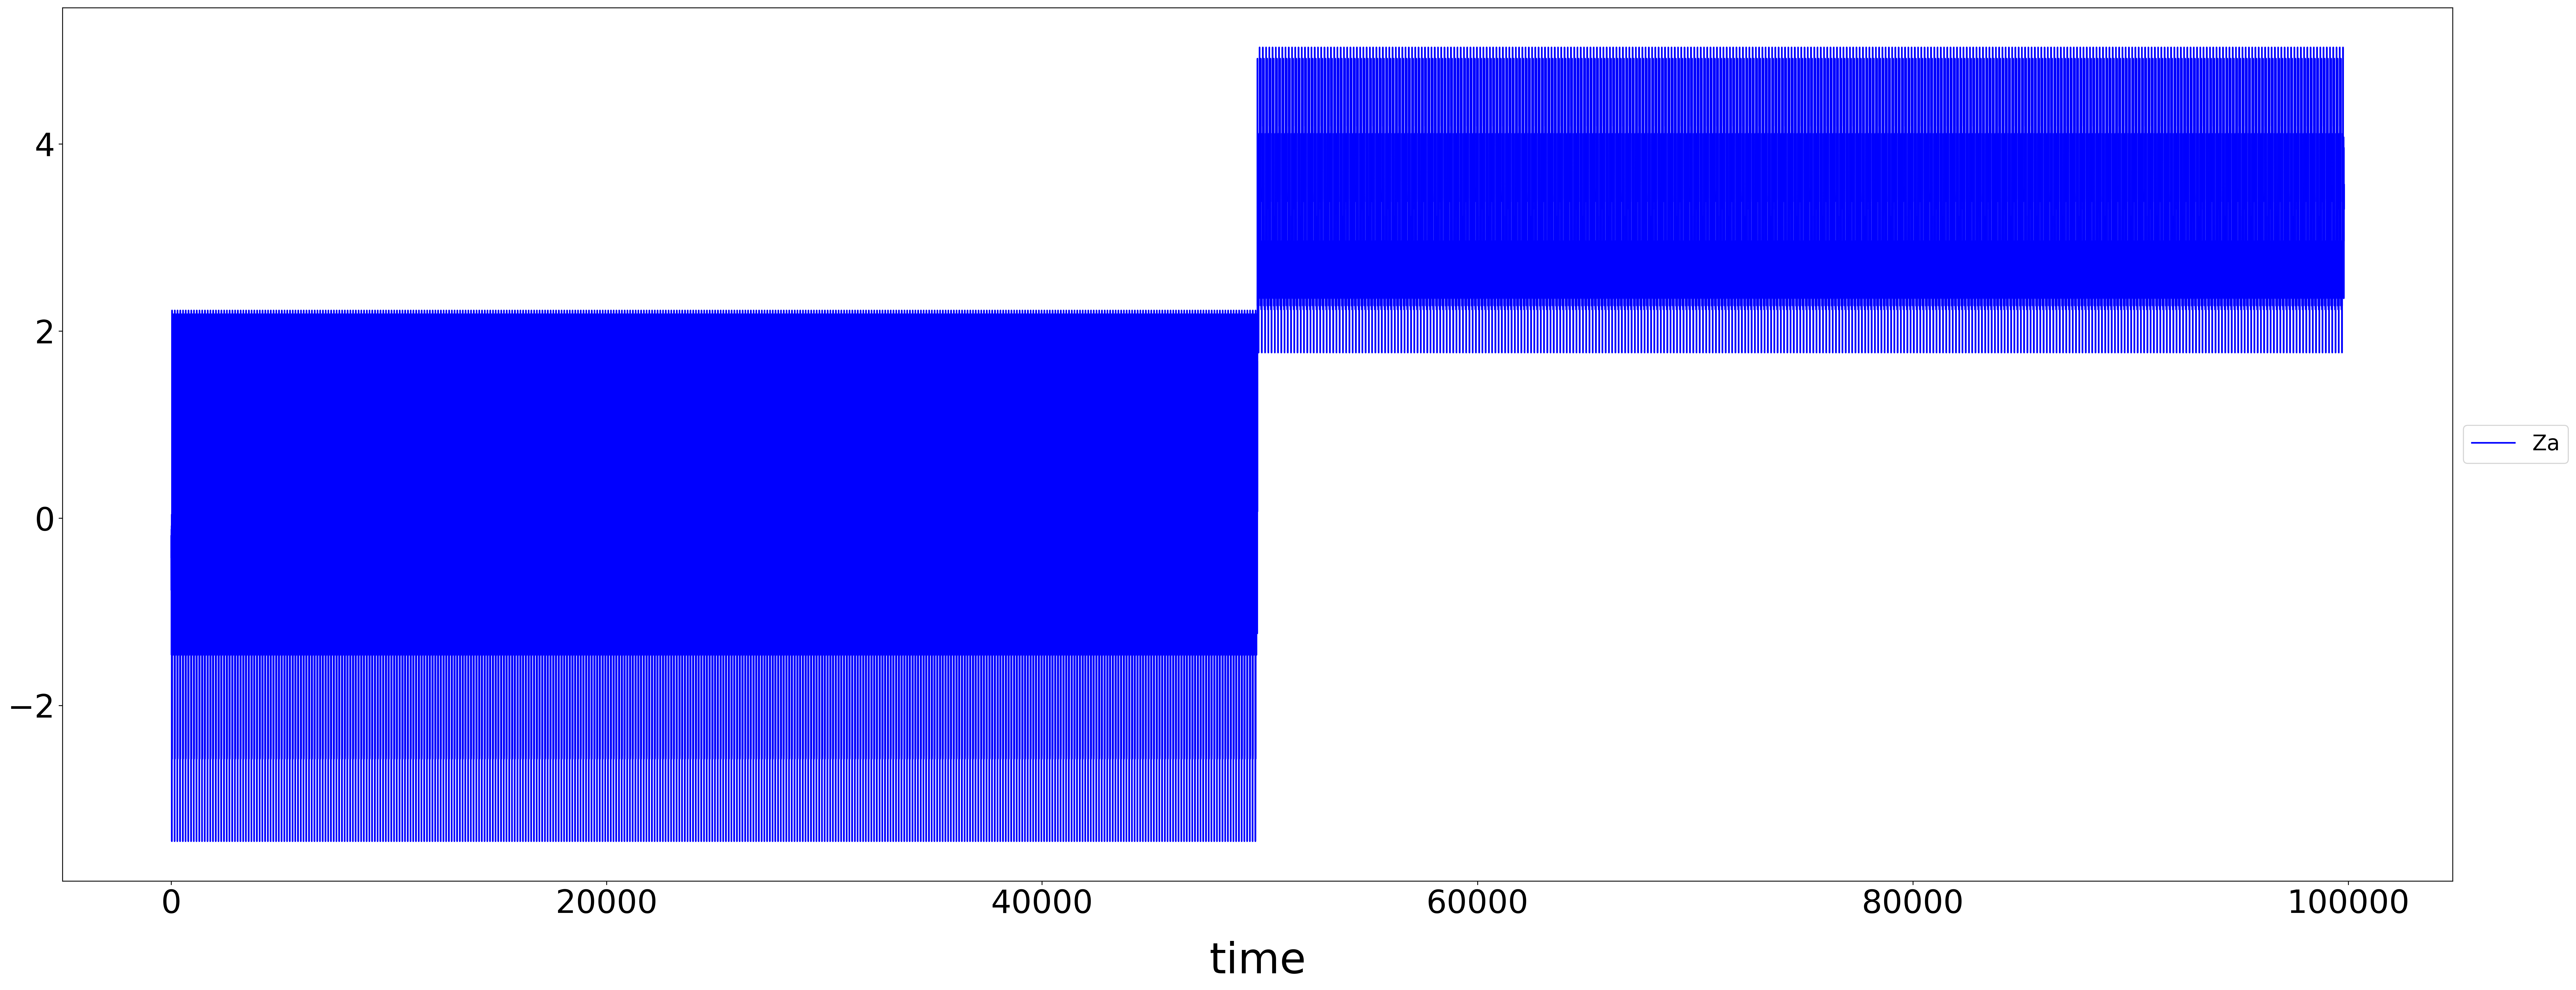

In [14]:
# show all data
plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xlabel("time", fontsize = 40, labelpad = 20)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.plot(lengthOfMergeData, mergeData[0], color = 'r', label = "Xa")
plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
plt.show()
# show all data
plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xlabel("time", fontsize = 40, labelpad = 20)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.plot(lengthOfMergeData, mergeData[1], color = 'g', label = "Ya")
plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
plt.show()
# show all data
plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xlabel("time", fontsize = 40, labelpad = 20)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.plot(lengthOfMergeData, mergeData[2], color = 'b', label = "Za")
plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
plt.show()

Show spectrum of merged data

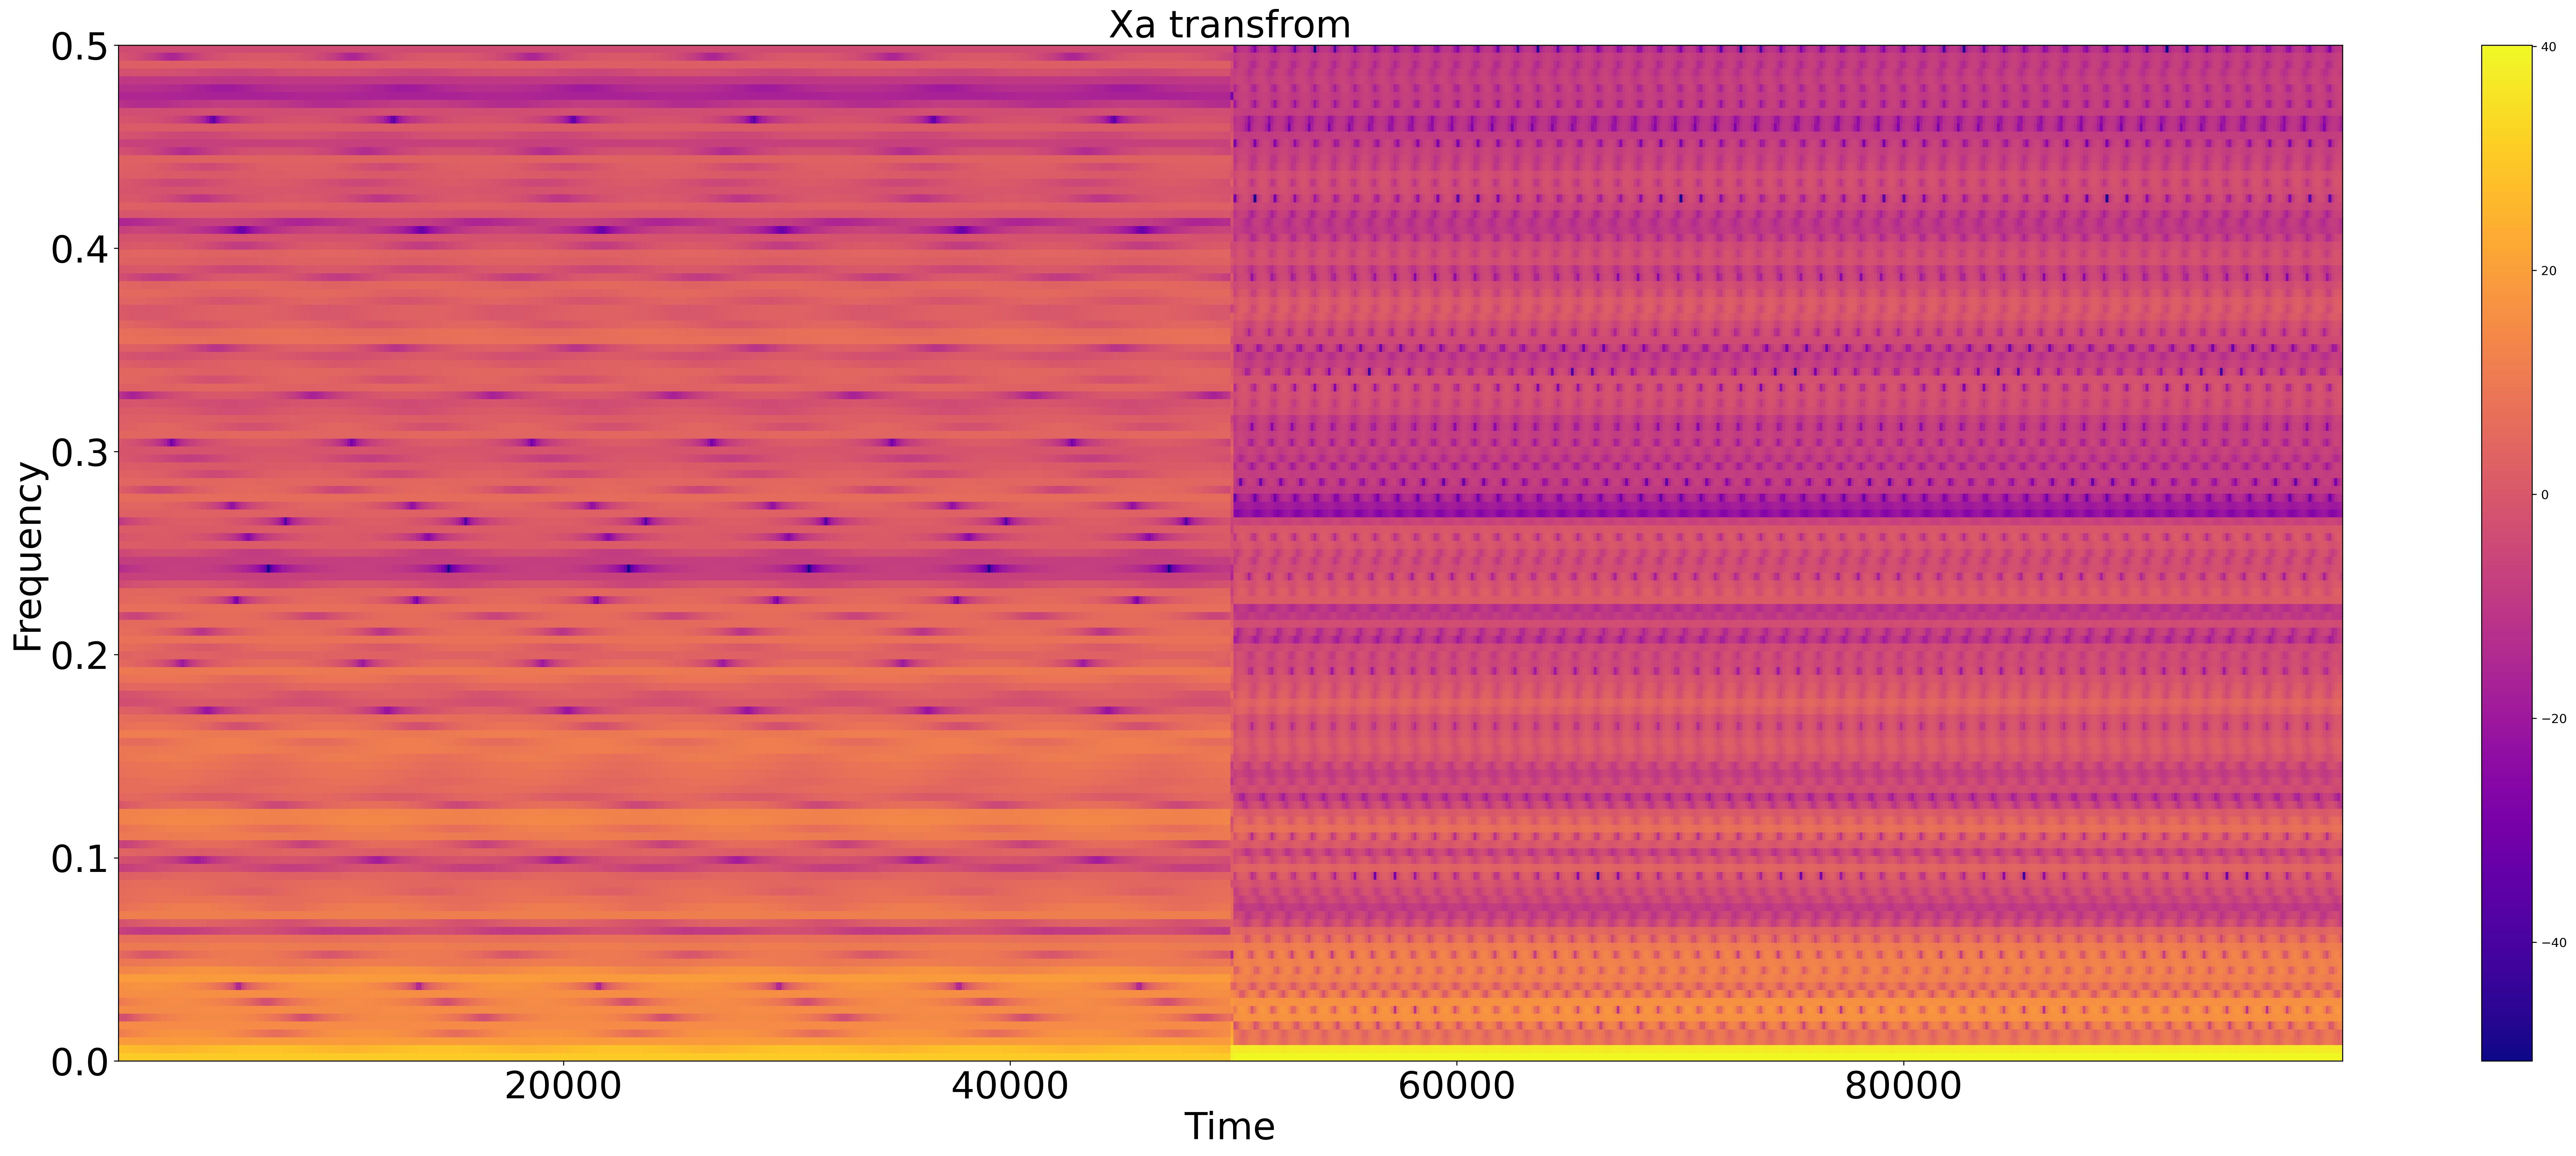

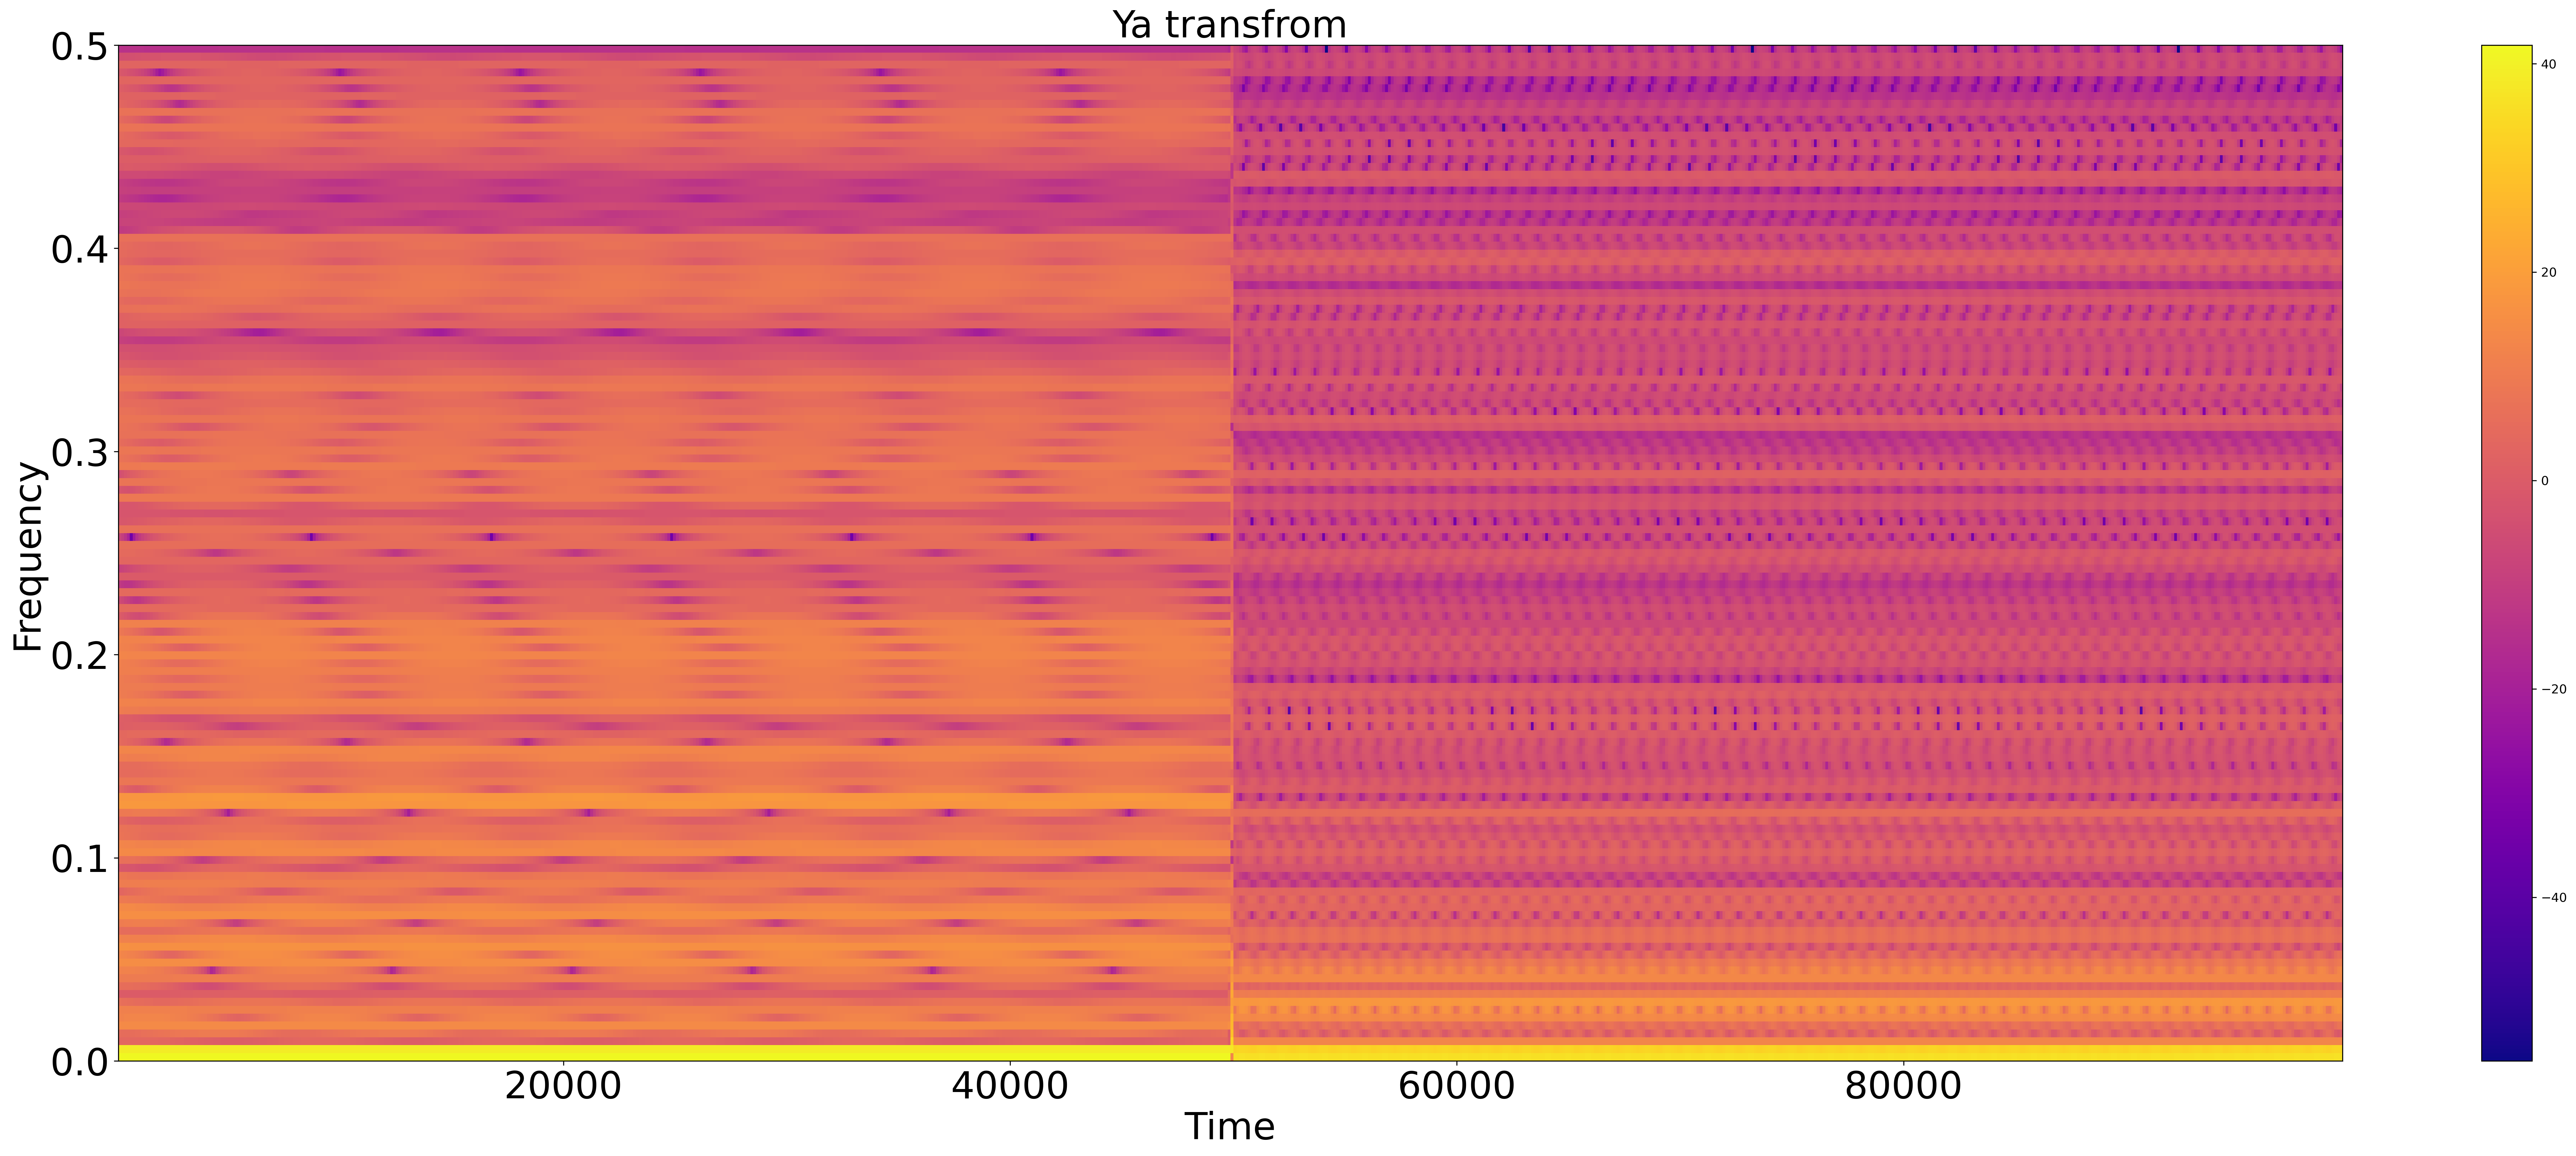

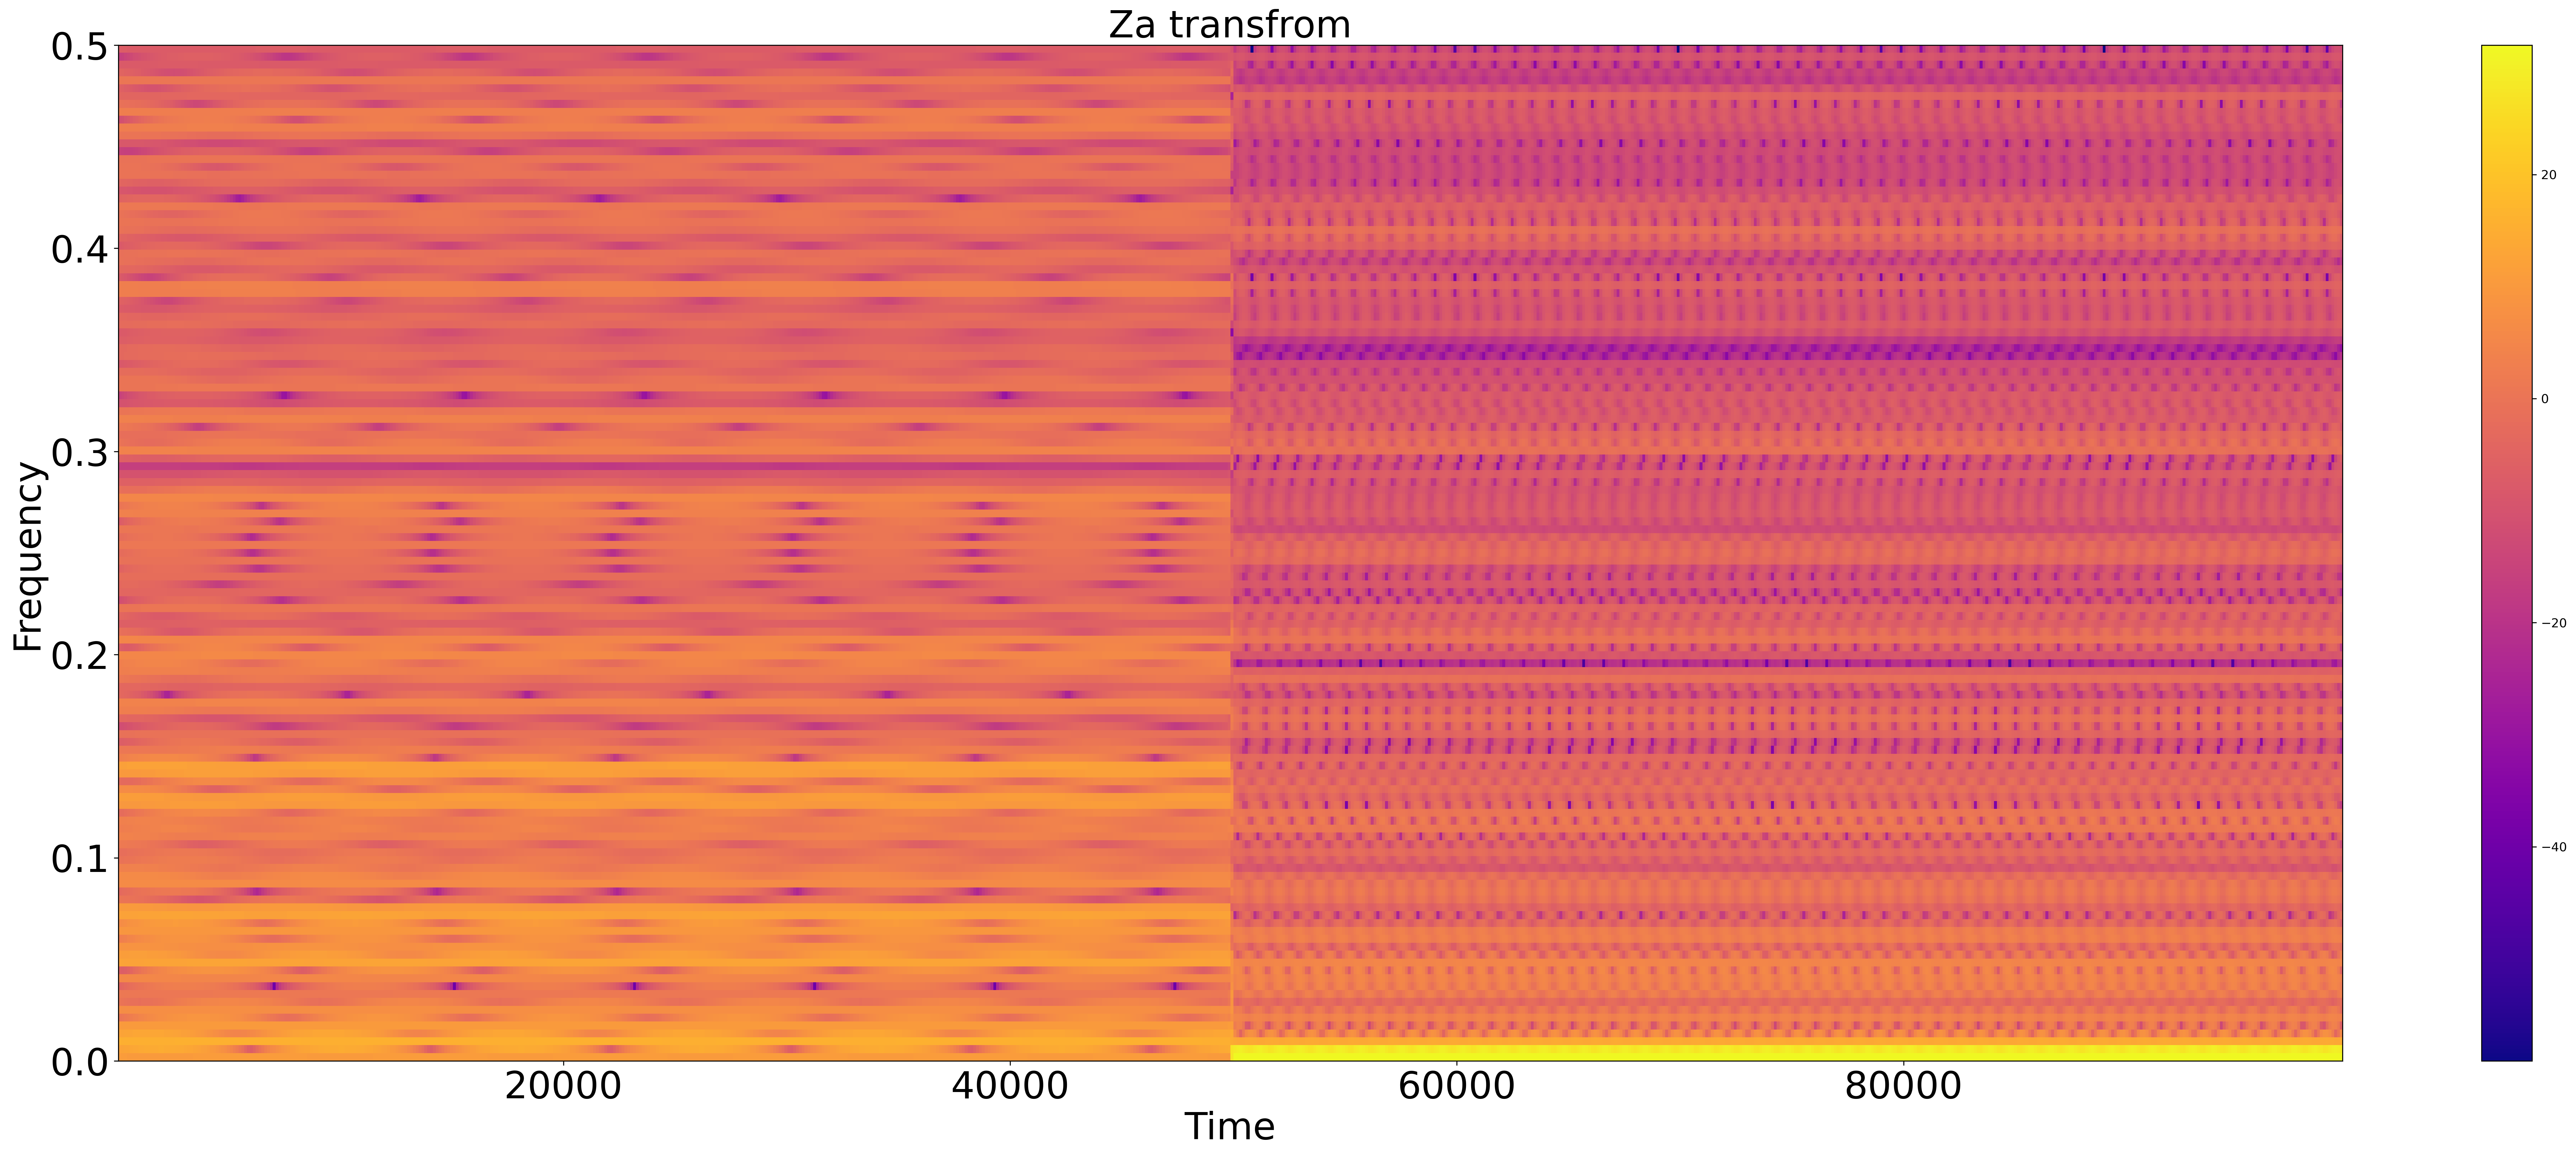

In [15]:
plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('Frequency',fontsize = 30)
plt.xlabel('Time',fontsize = 30)
plt.title('Xa transfrom',fontsize = 30)  
plt.specgram(mergeData[0],Fs=1,cmap='plasma')
plt.colorbar()
plt.show()

plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('Frequency',fontsize = 30)
plt.xlabel('Time',fontsize = 30)
plt.title('Ya transfrom',fontsize = 30)  
plt.specgram(mergeData[1],Fs=1,cmap='plasma')
plt.colorbar()
plt.show()

plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('Frequency',fontsize = 30)
plt.xlabel('Time',fontsize = 30)
plt.title('Za transfrom',fontsize = 30)  
plt.specgram(mergeData[2],Fs=1,cmap='plasma')
plt.colorbar()
plt.show()